In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rc
rc('font', **{'family': 'Libertine'})
rc('text', usetex=True)
rc('font', size=16)# Set the default text font size
rc('axes', titlesize=20)# Set the axes title font size
rc('axes', labelsize=16)# Set the axes labels font size
rc('xtick', labelsize=16)# Set the font size for x tick labels
rc('ytick', labelsize=16)# Set the font size for y tick labels
rc('legend', fontsize=16)# Set the legend font size

In [3]:
def draw_mean(df, save_file=None):
    fig = plt.figure(figsize=(5, 4))
    mark = ['x', '.', 'd']
    #mark = ['$-$', '.', '$/$']
    for i, method in enumerate(df["method"].unique()):
        sdf = df[df["method"]==method].copy()
        #
        plt.plot(sdf["nb_samples"], sdf['pf_mean'], marker=mark[i], color=f"C{i}", label=method)
        plt.fill_between(sdf["nb_samples"], sdf['pf_ic_low'], sdf['pf_ic_up'], color=f"C{i}", alpha=0.2, label="CI 95\%")
    plt.axhline(df["pf_ref"].unique(), color="k", zorder=0)
    plt.legend(ncols=3, bbox_to_anchor=(1.1, -0.17))
    plt.xlabel("Total sample size ($N \\times k_\#$)")
    plt.ylabel("Average $\hat{p_\mathrm{f}}$ (100 rep.)")
    plt.grid()
    plt.xscale('log')
    plt.yscale('log')
    if save_file is not None:
        plt.savefig(save_file, dpi=300, bbox_inches='tight')
    return fig

def draw_cov(df, save_file=None):
    fig = plt.figure(figsize=(5, 4))
    mark = ['x', '.', 'd']
    #mark = ['$-$', '.', '$/$']
    for i, method in enumerate(df["method"].unique()):
        sdf = df[df["method"]==method].copy()

        #
        plt.plot(sdf["nb_samples"], sdf['pf_std'] / sdf['pf_mean'], marker=mark[i], color=f"C{i}", label=method)
    plt.legend(ncols=3, bbox_to_anchor=(1.1, -0.17))
    plt.xlabel("Total sample size ($N \\times k_\#$)")
    plt.ylabel("Average C.o.V (100 rep.)")
    plt.grid()
    plt.xscale('log')
    plt.yscale('log')
    if save_file is not None:
        plt.savefig(save_file, dpi=300, bbox_inches='tight')
    return fig

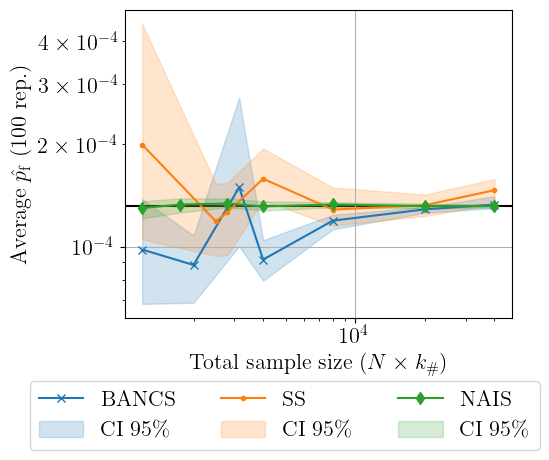

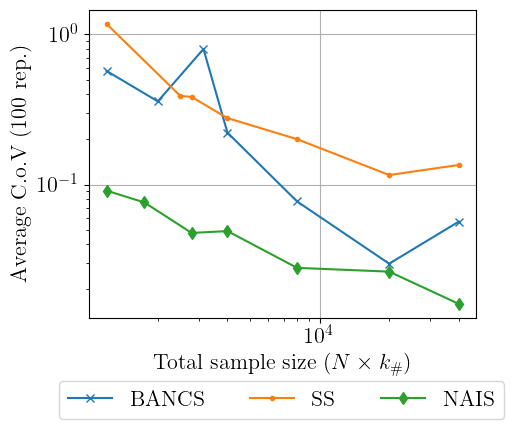

In [4]:
df = pd.read_csv("bancs_results/Parabolic_results_amise.csv")
draw_mean(df, save_file="bancs_figures/Parabolic_mean.png")
draw_cov(df, save_file="bancs_figures/Parabolic_cov.png");

## Four Branch problem

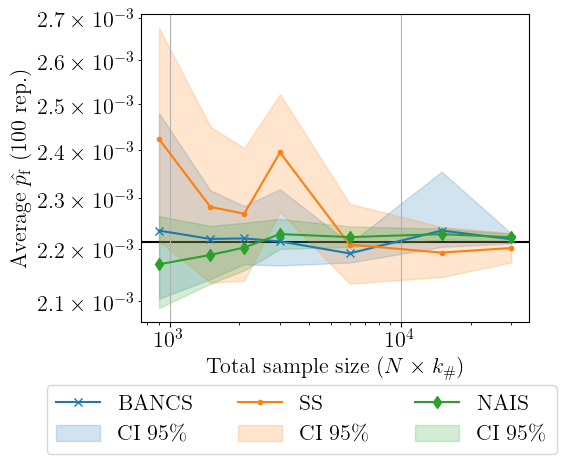

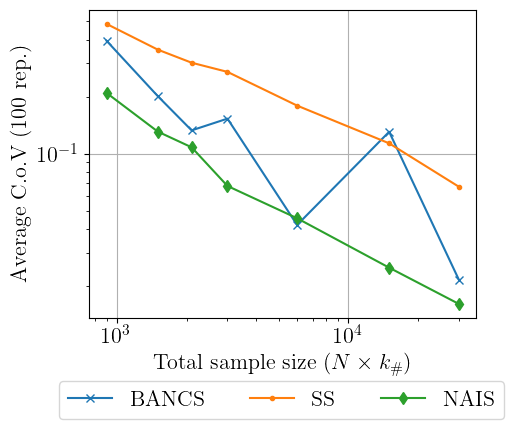

In [5]:
df = pd.read_csv("results/RP4B_results_amise.csv")
draw_mean(df, save_file="bancs_figures/RP4B_mean.png")
draw_cov(df, save_file="bancs_figures/RP4B_cov.png");

## Reliability problem 38

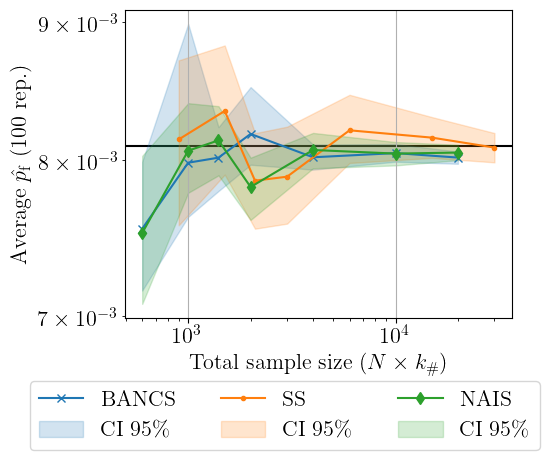

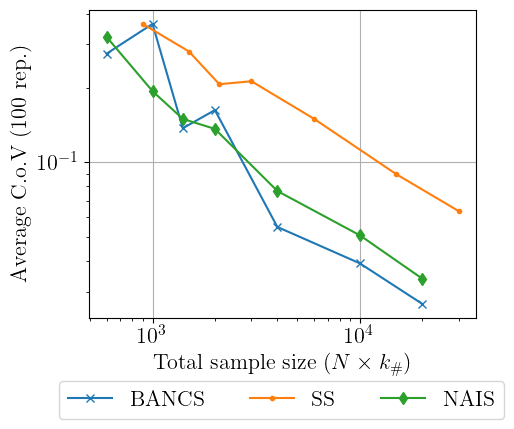

In [6]:
df = pd.read_csv("results/RP38_results_amise.csv")
draw_mean(df, save_file="bancs_figures/RP38_mean.png")
draw_cov(df, save_file="bancs_figures/RP38_cov.png");

## Oscillator case

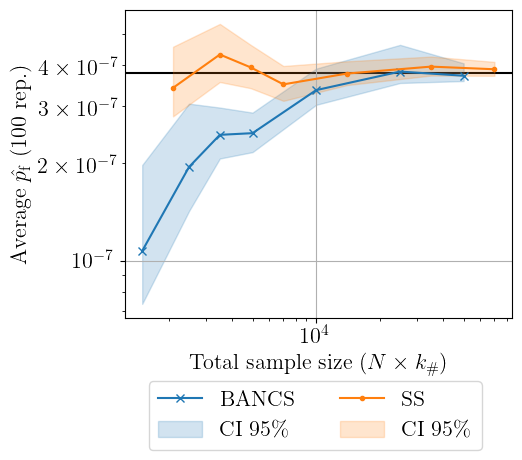

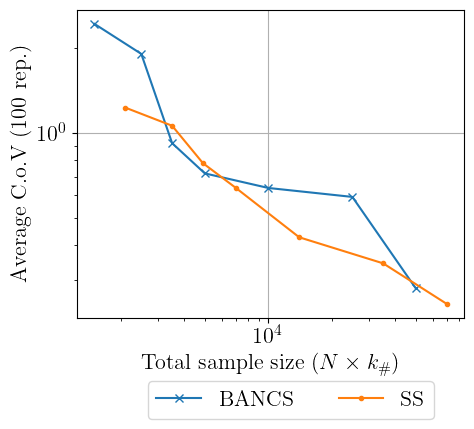

In [7]:
df = pd.read_csv("results/Oscillator_results_amise.csv")
draw_mean(df)
plt.legend(ncols=2, bbox_to_anchor=(0.95, -0.17))
plt.savefig("bancs_figures/Oscillator_mean.png", dpi=300, bbox_inches='tight')
draw_cov(df)
plt.legend(ncols=2, bbox_to_anchor=(0.95, -0.17))
plt.savefig("bancs_figures/Oscillator_cov.png", dpi=300, bbox_inches='tight');